In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.special import digamma

Make simulation data

In [12]:
def poisson_change_point(n_change_point,a,b,expected_k, niter = 1000):
    
    m = n_change_point
    al_lam = np.repeat(0., m+1)
    be_lam = np.repeat(0., m+1)
    expected_lam = np.repeat(0., m+1)
    expected_loglam = np.repeat(0., m+1)
    p = np.repeat(0,m)
    p = p.astype('object')

    for iteration in range(niter):
        for j in range(m + 1):
            if j == 0:
                al_lam[j] = a[j] + y[0:int(round(expected_k[j]))].sum()
                be_lam[j] = b[j] + expected_k[j]
                expected_lam[j] = al_lam[j]/be_lam[j]
                expected_loglam[j] = -np.log(be_lam[j]) + digamma(al_lam[j])
            elif j == m:
                al_lam[j] = a[j] + y[int(round(expected_k[j-1])):].sum()
                be_lam[j] = b[j] + len(y) - expected_k[j-1]
                expected_lam[j] = al_lam[j]/be_lam[j]
                expected_loglam[j] = -np.log(be_lam[j]) + digamma(al_lam[j])
            else:
                al_lam[j] = a[j] + y[int(round(expected_k[j-1])):int(round(expected_k[j]))].sum()
                be_lam[j] = b[j] + expected_k[j] - expected_k[j-1]
                expected_lam[j] = al_lam[j]/be_lam[j]
                expected_loglam[j] = -np.log(be_lam[j]) + digamma(al_lam[j])


        for j in range(m):
            prop = np.repeat(0.,len(y))
            if j==0:
                for k in range(len(y)):
                    prop[k] = np.exp((k+1)*(expected_lam[j+1]-expected_lam[j]) + (expected_loglam[j]- expected_loglam[j+1])*(y[:k].sum()))
            else:
                for k in range(int(round(expected_k[j-1])),len(y)):
                    prop[k] = np.exp((k+1)*(expected_lam[j+1]-expected_lam[j]) + (expected_loglam[j]- expected_loglam[j+1])*(y[int(round(expected_k[j-1])):k].sum()))
            p[j] = prop / prop.sum()
            expected_k[j] = (p[j] * np.arange(1,(len(y)+1))).sum()
    return(expected_k,expected_lam,p)

# simulation 1

In [ ]:
np.random.seed(4428)
y = np.concatenate([np.random.poisson(lam = 10,size =10),
                    np.random.poisson(lam = 30,size =30),
                    np.random.poisson(lam = 10,size =20),
                    np.random.poisson(lam = 20,size =50)])
y = y.astype('float')
plt.title('simulation data')
plt.plot(y,color='gray')
plt.show()

In [24]:
m = 3
b = np.array([1,1,1,1])
a = np.array([10,20,30,40])
expected_k = np.array([10.,30.,50.])

In [25]:
result = poisson_change_point(3,a,b,expected_k)

In [17]:
result[0]

array([10.99622303, 41.00408348, 61.29053603])

In [18]:
result[1]

array([11.50362073, 29.25064764, 10.89895085, 21.34402416])

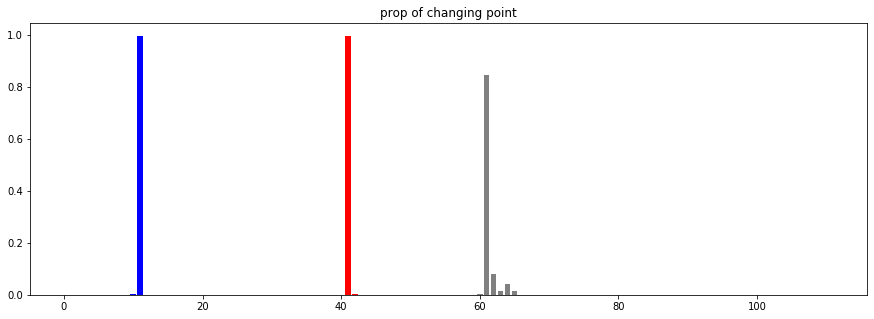

In [19]:
plt.figure(figsize =(10,5))
plt.title('prop of changing point')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][0],color='blue')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][1],color='red')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][2],color='gray')
plt.show()

# simulation 2

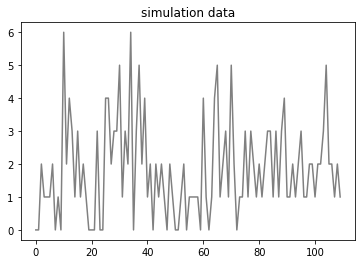

In [26]:
np.random.seed(4428)
y = np.concatenate([np.random.poisson(lam = 1,size =10),
                    np.random.poisson(lam = 3,size =30),
                    np.random.poisson(lam = 1,size =20),
                    np.random.poisson(lam = 2,size =50)])
y = y.astype('float')
plt.title('simulation data')
plt.plot(y,color='gray')
plt.show()

In [44]:
m = 3
b = np.array([1,1,1,1])
a = np.array([3,3,3,3])
expected_k = np.array([10.,30.,50.])

In [45]:
result = poisson_change_point(3,a,b,expected_k)

In [46]:
result[0]

array([ 9.02726701, 80.64847448, 96.63133274])

In [47]:
result[1]

array([1.09747922, 1.89957067, 1.96468614, 2.17040579])

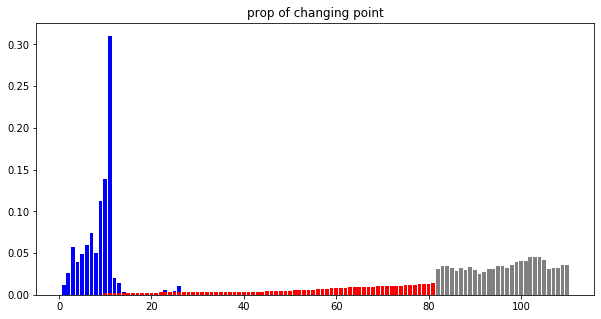

In [48]:
plt.figure(figsize =(10,5))
plt.title('prop of changing point')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][0],color='blue')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][1],color='red')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][2],color='gray')
plt.show()

# simulation 3

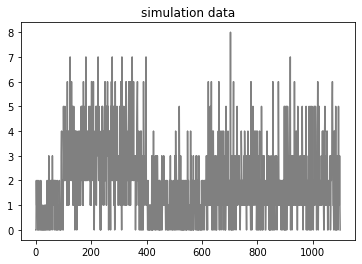

In [49]:
np.random.seed(4428)
y = np.concatenate([np.random.poisson(lam = 1,size =100),
                    np.random.poisson(lam = 3,size =300),
                    np.random.poisson(lam = 1,size =200),
                    np.random.poisson(lam = 2,size =500)])
y = y.astype('float')
plt.title('simulation data')
plt.plot(y,color='gray')
plt.show()

In [58]:
m = 3
b = np.array([3,3,3,3])
a = np.array([3,3,3,3])
expected_k = np.array([100.,300.,500.])

In [59]:
result = poisson_change_point(3,a,b,expected_k)

In [60]:
result[0]

array([ 99.9295771 , 401.4922917 , 618.40744463])

In [61]:
result[1]

array([0.92296114, 2.9550564 , 1.12770765, 1.99342724])

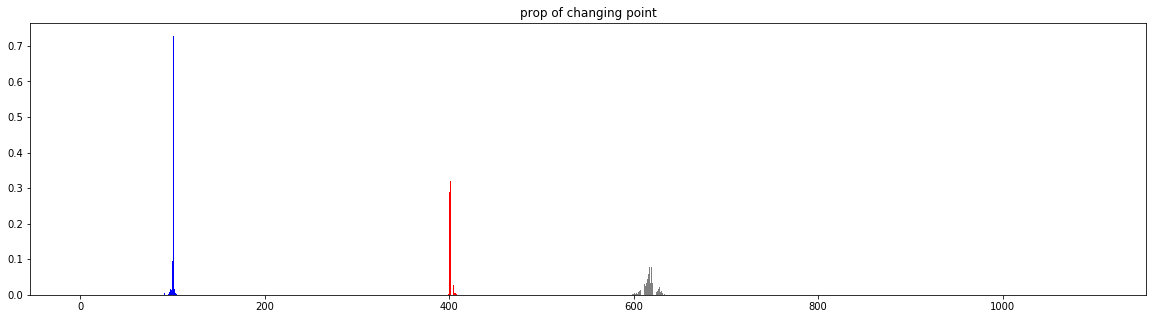

In [63]:
plt.figure(figsize =(20,5))
plt.title('prop of changing point')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][0],color='blue')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][1],color='red')
plt.bar(x= np.arange(1,len(y)+1),height=result[2][2],color='gray')
plt.show()